In [1]:
#import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
#from scipy.optimize import fsolve
#from scipy.interpolate import interp1d
import math

In [2]:
# Definir parámetros cosmológicos comunes
k_out = [0.1]  # unidades de 1/Mpc

common_settings = {
    'output': 'mPk,tCl,pCl,lCl',
    'P_k_max_1/Mpc': 3.0,
    'k_output_values': str(k_out).strip('[]'),
    'h': 0.6732117,
    'Omega_fld': 0,
    'Omega_smg': -1,
    'Omega_Lambda': 0.69,
    'Omega_b': 0.02238280,
    'Omega_cdm': 0,
    'gravity_model': 'quintessence_monomial',
    'x0_schm': 1,
    #'theta_schm': 2.7e-17,
    'DM_schm': 0.26,
    'h_schm': 1,
    'V0_schm': 1,
    'lambda_schm': 1,
    'A_s': 2.100549e-09,
    'n_s': 0.9660499,
    'tau_reio': 0.05430842,
    'compute damping scale': 'yes',
    'lensing':'yes'
}

# Lista de valores para theta_schm
x_variable = [1e-13, 1e-14, 1e-15, 1e-17, 1e-19]

# Background
z_all = []
#H_z_all = []
a_all = []
Omega_rad_all = []
Omega_bar_all = []
Omega_lambda_all = []
Omega_sch_all = []
w_sch_all = []
rho_rel_all = []
# Listas para perturbaciones lineales
clTT_all = []
clEE_all = []
clPP_all = []
Pk_all = []
ll_all = []
#kk_all = []  # Para almacenar los valores de k

# Ciclo para iterar sobre los diferentes valores de theta_schm
for x in x_variable:
    common_settings['theta_schm'] = x  # Actualizar el valor de theta_schm
    
    # Crear una nueva instancia de Class y configurar
    cosmo = Class()
    cosmo.set(common_settings)
    cosmo.compute()
    
    # Obtener el background
    background = cosmo.get_background()

    # Extraer las cantidades necesarias del background
    z = background['z']                    # Redshift
    #H_z = background['H [1/Mpc]']          # Hubble parameter H(z)
    a = 1 / (1 + z)                        # Factor de escala
    rho_gamma = background['(.)rho_g']     # Densidad de energía de fotones
    rho_nu = background['(.)rho_ur']     # Densidad de energía de fotones 
    rad = rho_gamma + rho_nu              # Radiación total (fotones + neutrinos relativistas)
    bar = background['(.)rho_b']           # Densidad de energía bariónica
    lamb = background['(.)rho_lambda']     # Densidad de energía de la constante cosmológica
    rho_crit = background['(.)rho_crit']   # Densidad crítica
    rho_sch = background['(.)rho_smg']     # Densidad de energía del campo escalar (quintessencia)
    p_sch = background['(.)p_smg']         # Presión del campo escalar
    
    # Calcular las fracciones de densidad
    Omega_rad = rad / rho_crit
    Omega_bar = bar / rho_crit
    Omega_lambda = lamb / rho_crit
    Omega_sch = rho_sch / rho_crit
    
    # Calcular el parámetro de ecuación de estado w_sch
    w_sch = (p_sch - lamb) / (rho_sch + lamb)
    
    # Densidad relativista total
    rho_rel = rad + 3 * p_sch

    # Guardar los resultados en las listas correspondientes
    z_all.append(z)
    #H_z_all.append(H_z)
    a_all.append(a)
    Omega_rad_all.append(Omega_rad)
    Omega_bar_all.append(Omega_bar)
    Omega_lambda_all.append(Omega_lambda)
    Omega_sch_all.append(Omega_sch)
    w_sch_all.append(w_sch)
    rho_rel_all.append(rho_rel)
    
    # Ahora obtener los espectros angulares C_l
    cls = cosmo.lensed_cl(2500)  # Espectros angulares lensed hasta l=2500
    ll = cls['ell'][2:]  # Valores de l
    clTT = cls['tt'][2:]  # C_l^TT
    clEE = cls['ee'][2:]  # C_l^EE
    clPP = cls['pp'][2:]  # C_l^PP
    
    # Guardar C_l en las listas correspondientes
    clTT_all.append(clTT)
    clEE_all.append(clEE)
    clPP_all.append(clPP)
    ll_all.append(ll)

    # Obtener el espectro de potencia P(k)
    kk = np.logspace(-4, np.log10(3), 1000)  # Valores de k en h/Mpc
    Pk = []  # Inicializar lista para P(k)

    h = cosmo.h()  # Obtener h (para conversión de k)
    for k in kk:
        Pk.append(cosmo.pk(k * h, 0.) * h ** 3)  # P(k) en (Mpc/h)^3

    # Guardar los resultados de P(k) y k
    #kk_all.append(kk)
    Pk_all.append(Pk)
    
    # Limpiar la memoria de CLASS al final de cada ciclo
    cosmo.struct_cleanup()

# Ahora tienes todos los valores guardados en las listas
# Puedes hacer gráficas o análisis adicional aquí


aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72756
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72756
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí voy y todo bien 2.04415
aquí voy y todo bien 2.08008
aquí voy y todo bien 2.06212
aquí voy y todo bien 2.08008
aquí voy y todo bien 1
aquí voy y todo bien 1
aquí voy y todo bien 1.28753
aquí voy y todo bien 2.72755
aquí voy y todo bien 2.00754
aquí voy y todo bien 2.08076
aquí

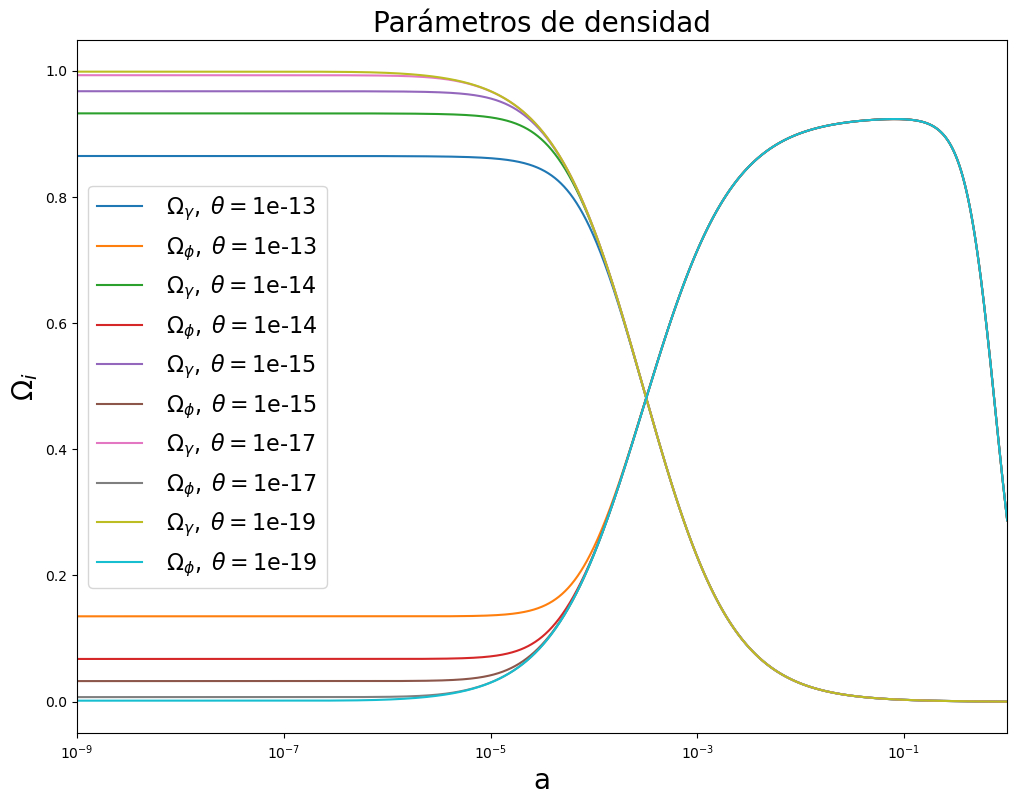

In [3]:
plt.figure(figsize=(12, 9))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
    
#plt.plot(a0,Omega_lambda0+Omega_rad0+Omega_sch0+Omega_bar0,color="green",label="Constricción de Friedmann")
#plt.plot(a,Omega_rad,color="black",label="$\Omega _{\gamma}$")
#plt.plot(a,Omega_bar,color="red",label="$\Omega _{b}$")
#plt.plot(a,Omega_sch,"--",color="blue",label="$\Omega _{\phi DM}$")
#plt.plot(a,Omega_lambda, "--", color="purple" ,label="$\Omega _{\phi DE}$")
#plt.plot(a,Omega_sch + Omega_lambda, color="blue",label="$\Omega _{\phi}$")


#plt.plot(a,Omega_lambda+Omega_cdm+Omega_bar+Omega_rad,color="black",label="$\Omega _{total}$")
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

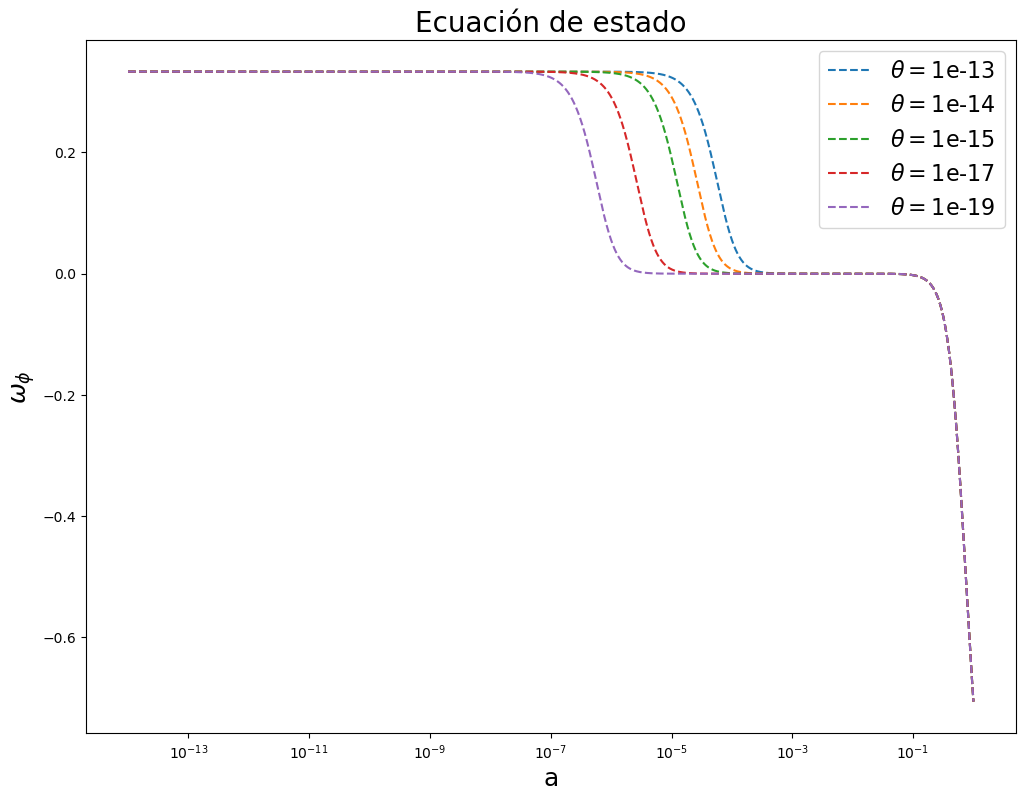

In [4]:
#plt.yscale("log")
plt.figure(figsize=(12, 9))
#plt.xlim(1e-10,1)

plt.xscale("log")
for i in range(len(Omega_rad_all)):
#plt.plot(a,w_sch0,"--", color="purple",label="$\omega _{\phi}$")
    plt.plot(a,w_sch_all[i],"--",label="$\\theta = $"+str(x_variable[i]))


#plt.plot(a,1/3, color="red",label="$\omega _{sch}$")

plt.title('Ecuación de estado', fontsize=20)
plt.xlabel('a',fontsize=18)
plt.ylabel('$\omega _{\phi}$',fontsize=18)
plt.legend(fontsize=16)

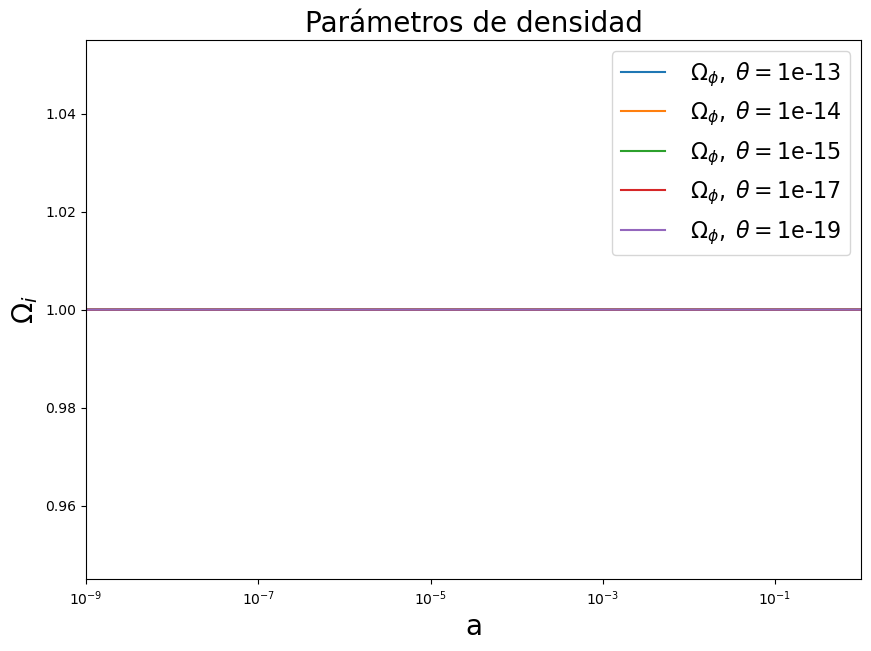

In [5]:
plt.figure(figsize=(10, 7))
#plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-9,1)
for i in range(len(Omega_rad_all)):
    #plt.plot(a, Omega_rad_all[i], label = " $\Omega _{\gamma}, \; \\theta = $"+str(x_variable[i]))
    plt.plot(a, Omega_sch_all[i]+Omega_rad_all[i]+Omega_bar_all[i]+Omega_lambda_all[i], label = " $\Omega _{\phi}, \; \\theta = $"+str(x_variable[i]))
plt.title('Parámetros de densidad', fontsize=20)
plt.xlabel('a',fontsize=20)
plt.ylabel('$\Omega _{i}$',fontsize=20)
plt.legend(fontsize=16)

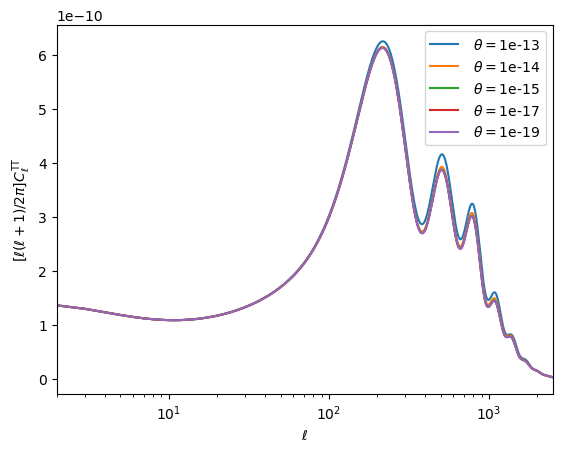

In [6]:
# plot C_l^TT
from math import pi
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
for i in range(len(ll_all)):
    plt.plot(ll_all[i],clTT_all[i]*ll_all[i]*(ll_all[i]+1)/2./pi,label = " $\\theta = $"+str(x_variable[i]))
plt.legend()

In [7]:
# create instance of the class "Class"
LambdaCDM1 = Class()
# pass input parameters
LambdaCDM1.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM1.compute()
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk1 = [] # P(k) in (Mpc/h)**3
h1 = LambdaCDM1.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk1.append(LambdaCDM1.pk(k*h1,0.)*h**3) # function .pk(k,z)

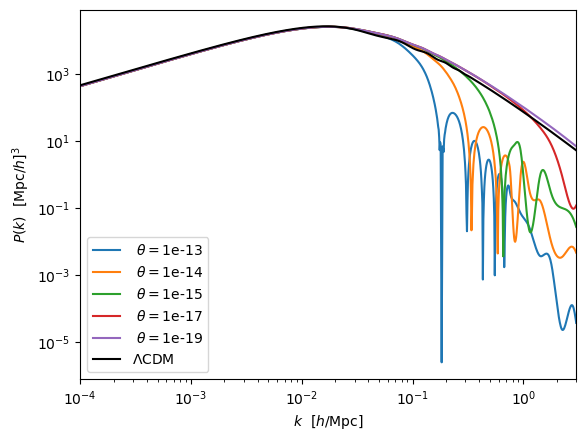

In [8]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
for i in range(len(Pk_all)):
 plt.plot(kk,Pk_all[i], label = " $\\theta = $"+str(x_variable[i]))
plt.plot(kk,Pk1,color='black',label=r"$\Lambda$CDM")
plt.legend()